In [173]:
import pandas as pd
import numpy as np

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import json

from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics.pairwise import linear_kernel

# Loading CSV Files and Cleaning

In [174]:
df = pd.read_csv("data/final/final_dataset_clean.csv")

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6767 entries, 0 to 6766
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   character_credits     6767 non-null   object
 1   character_died_in     6767 non-null   object
 2   concept_credits       6767 non-null   object
 3   cover_date            6767 non-null   object
 4   description           6669 non-null   object
 5   has_staff_review      6767 non-null   object
 6   id                    6767 non-null   int64 
 7   issue_number          6767 non-null   object
 8   location_credits      6767 non-null   object
 9   name                  6767 non-null   object
 10  object_credits        6767 non-null   object
 11  person_credits        6767 non-null   object
 12  story_arc_credits     6767 non-null   object
 13  team_credits          6767 non-null   object
 14  team_disbanded_in     6767 non-null   object
 15  volume                6767 non-null   

In [176]:
missing_values = df['description'].isnull().sum()
print(f"Missing Values: {missing_values}")

Missing Values: 98


**final_fillna** is just some final preprocessing. There cannot be null values when I go to vectorize. I found that my description lost some data between being exported and imported. 

In [177]:
def final_fillna(df):
    df['description'] = df['description'].fillna('')
    df['combined_description'] = df['combined_description'].fillna('')
    lst = ['character_credits', 'character_died_in', 'concept_credits',
           'location_credits', 'object_credits', 'person_credits', 'story_arc_credits', 
           'team_credits', 'team_disbanded_in', 'volume']
final_fillna(df)

# TfidVectorizing
I vectorized both the combined_description and each of the individual features in preparation for the model. 

In [178]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_description'])

**features within combined_description** 'character_credits', 'concept_credits', 'location_credits', 'object_credits', 'person_credits', 'story_arc_credits', 'team_credits', 'volume'

In [179]:
tfidf_des = TfidfVectorizer(stop_words='english')
tfidf_des_matrix = tfidf_des.fit_transform(df['description'])

In [180]:
tfidf_char = TfidfVectorizer(stop_words='english')
tfidf_char_matrix = tfidf_char.fit_transform(df['character_credits'])

In [181]:
tfidf_concept = TfidfVectorizer(stop_words='english')
tfidf_concept_matrix = tfidf_concept.fit_transform(df['concept_credits'])

In [182]:
tfidf_location = TfidfVectorizer(stop_words='english')
tfidf_location_matrix = tfidf_location.fit_transform(df['location_credits'])

In [183]:
tfidf_object = TfidfVectorizer(stop_words='english')
tfidf_object_matrix = tfidf_object.fit_transform(df['object_credits'])

In [184]:
tfidf_person = TfidfVectorizer(stop_words='english')
tfidf_person_matrix = tfidf_person.fit_transform(df['person_credits'])

In [185]:
tfidf_arc = TfidfVectorizer(stop_words='english')
tfidf_arc_matrix = tfidf_arc.fit_transform(df['story_arc_credits'])

In [186]:
tfidf_team = TfidfVectorizer(stop_words='english')
tfidf_team_matrix = tfidf_team.fit_transform(df['team_credits'])

In [187]:
tfidf_vol = TfidfVectorizer(stop_words='english')
tfidf_vol_matrix = tfidf_vol.fit_transform(df['volume'])

# Top Features Each Individual Column

## description

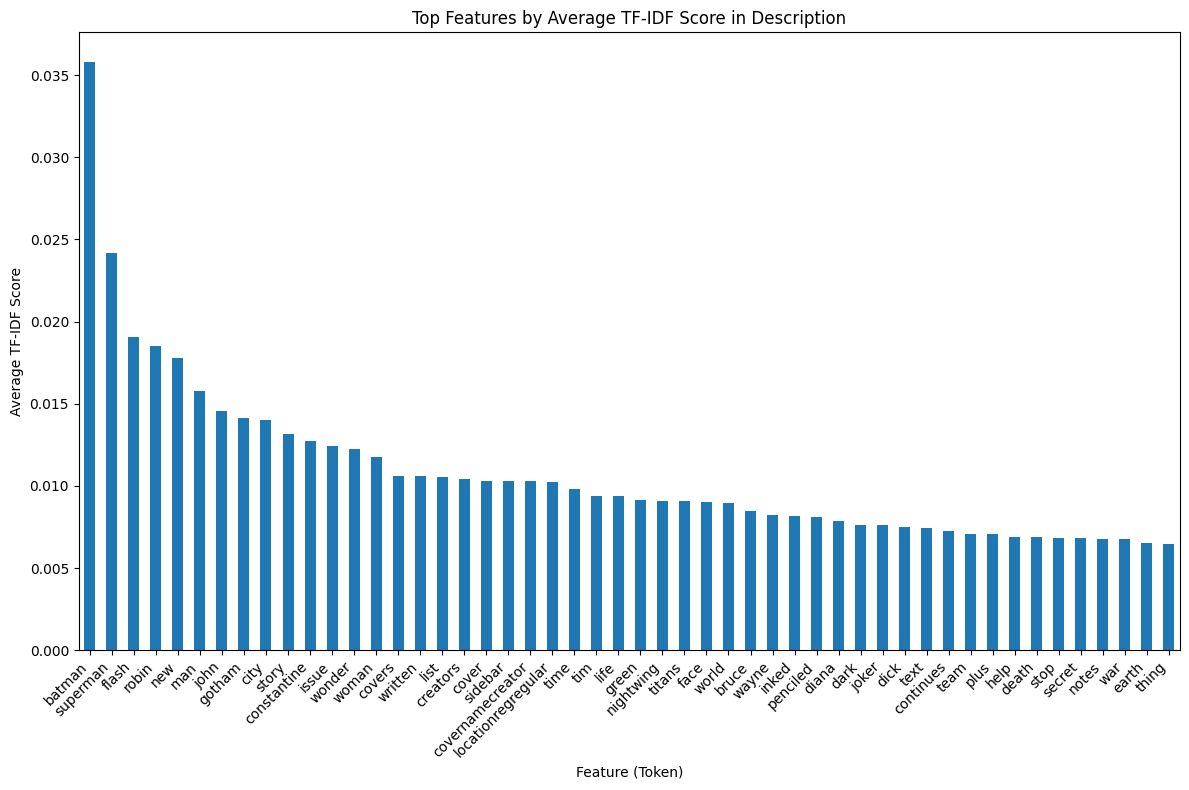

In [188]:
#tfidf_des, tfidf_des_matrix 
feature_names_des = tfidf_des.get_feature_names_out()
df_tfidf_des = pd.DataFrame(tfidf_des_matrix.toarray(), columns=feature_names_des)

avg_tfidf_scores_des = df_tfidf_des.mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 8))
avg_tfidf_scores_des.plot(kind='bar')
plt.title('Top Features by Average TF-IDF Score in Description')
plt.xlabel('Feature (Token)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## character_credits

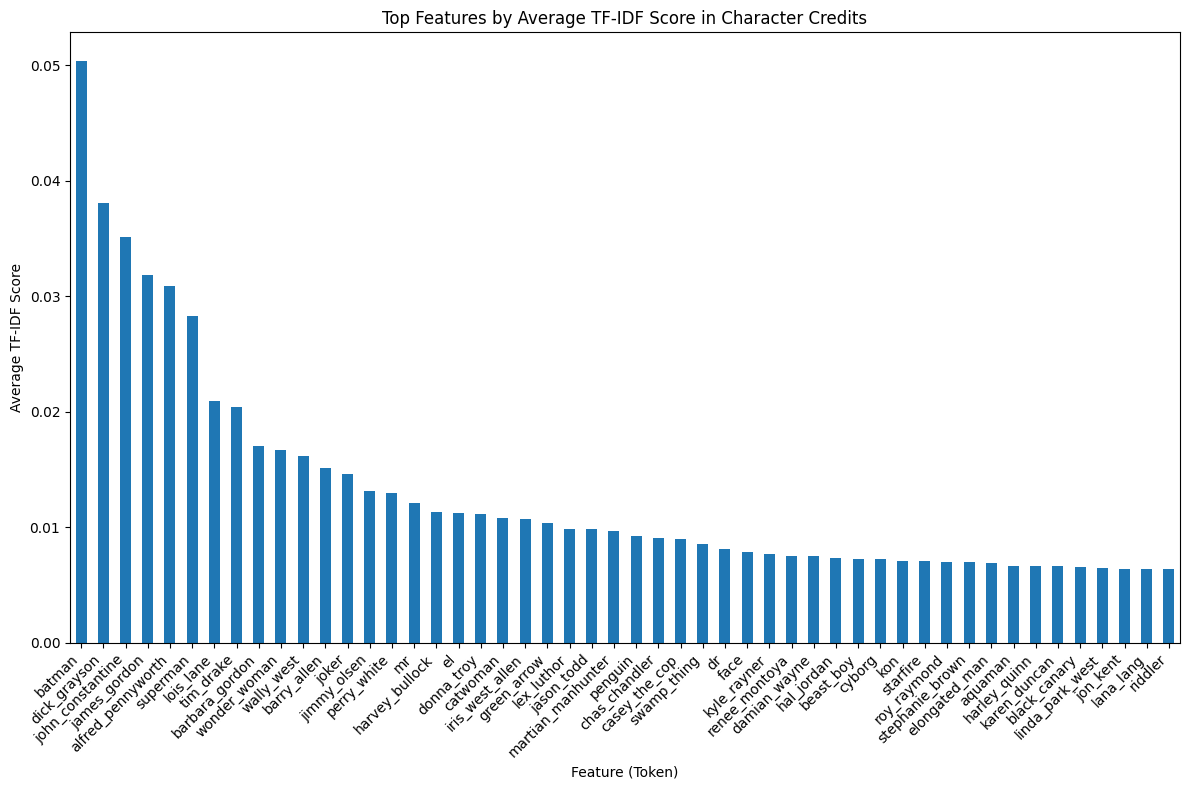

In [189]:
#tfidf_char, tfidf_char_matrix 
feature_names_char = tfidf_char.get_feature_names_out()
df_tfidf_char = pd.DataFrame(tfidf_char_matrix.toarray(), columns=feature_names_char)

avg_tfidf_scores_char = df_tfidf_char.mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 8))
avg_tfidf_scores_char.plot(kind='bar')
plt.title('Top Features by Average TF-IDF Score in Character Credits')
plt.xlabel('Feature (Token)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## concept credits

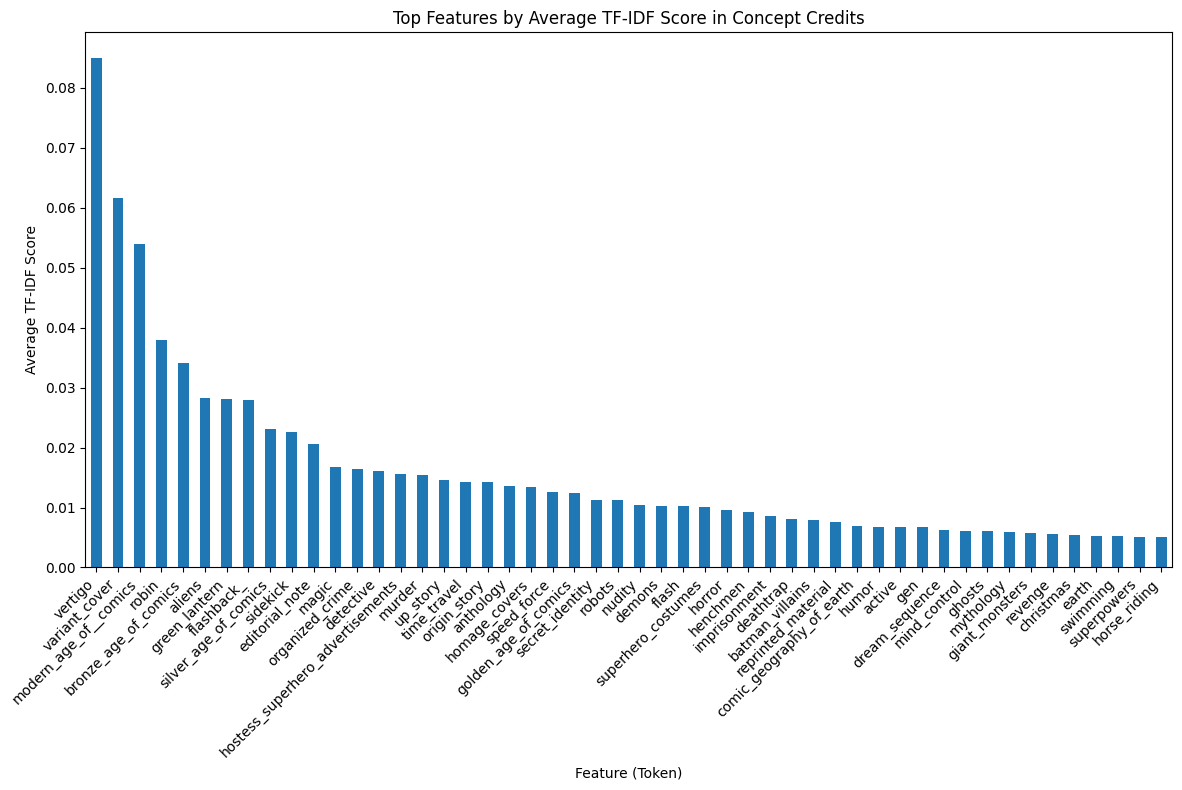

In [190]:
#tfidf_concept, tfidf_concept_matrix 
feature_names_concept = tfidf_concept.get_feature_names_out()
df_tfidf_concept = pd.DataFrame(tfidf_concept_matrix.toarray(), columns=feature_names_concept)

avg_tfidf_scores_concept = df_tfidf_concept.mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 8))
avg_tfidf_scores_concept.plot(kind='bar')
plt.title('Top Features by Average TF-IDF Score in Concept Credits')
plt.xlabel('Feature (Token)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## location credits

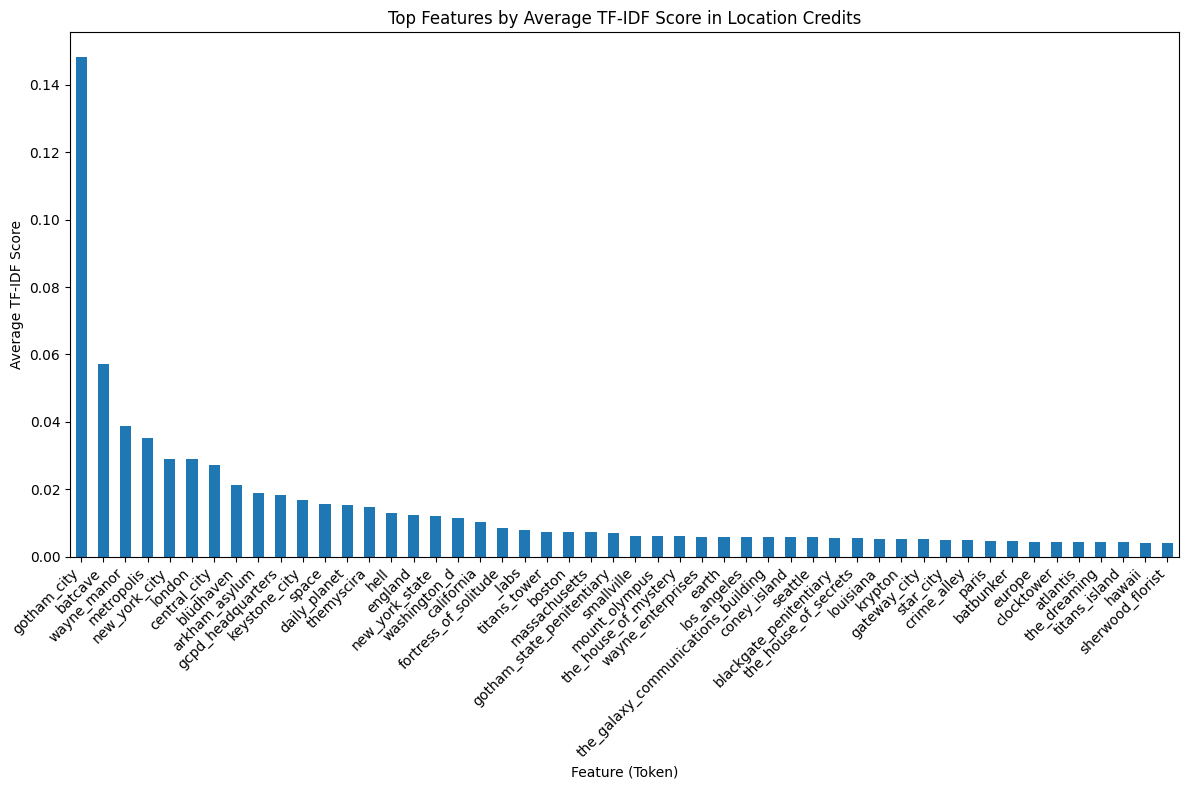

In [191]:
feature_names_location = tfidf_location.get_feature_names_out()
df_tfidf_location = pd.DataFrame(tfidf_location_matrix.toarray(), columns=feature_names_location)

avg_tfidf_scores_location = df_tfidf_location.mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 8))
avg_tfidf_scores_location.plot(kind='bar')
plt.title('Top Features by Average TF-IDF Score in Location Credits')
plt.xlabel('Feature (Token)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## object credits

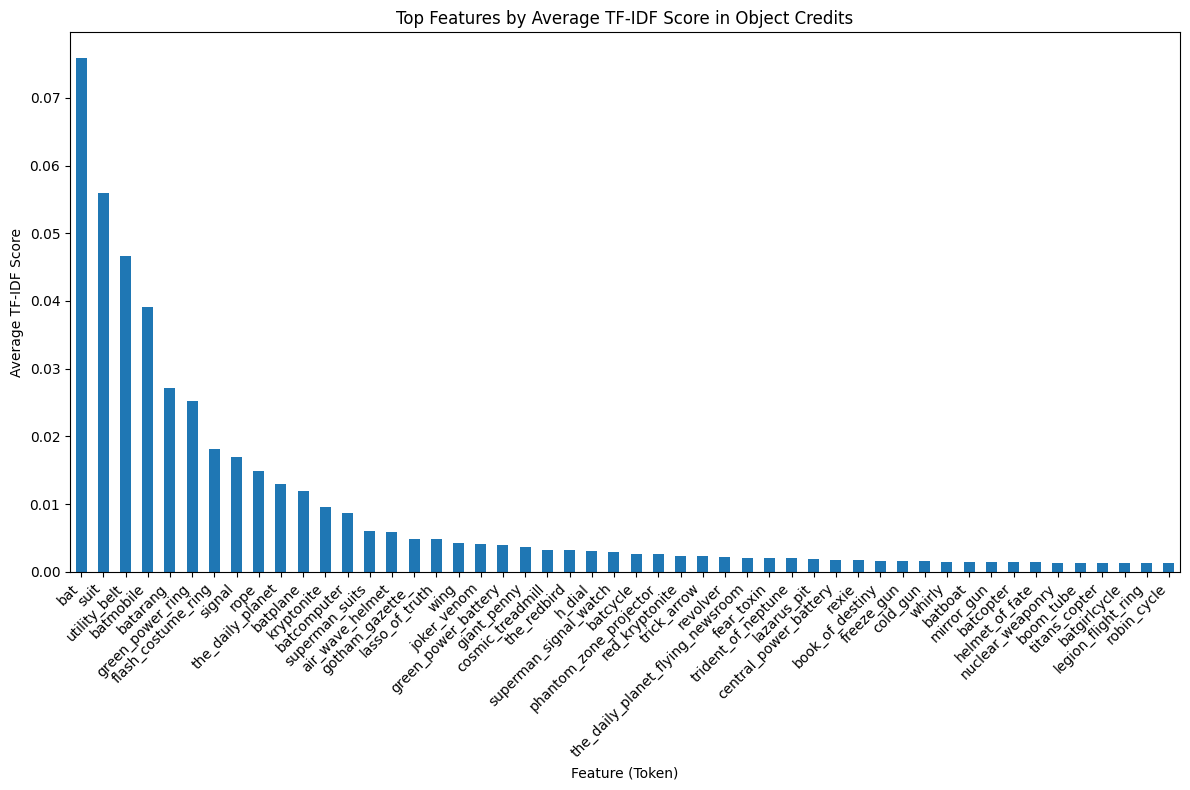

In [192]:
feature_names_object = tfidf_object.get_feature_names_out()
df_tfidf_object = pd.DataFrame(tfidf_object_matrix.toarray(), columns=feature_names_object)

avg_tfidf_scores_object = df_tfidf_object.mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 8))
avg_tfidf_scores_object.plot(kind='bar')
plt.title('Top Features by Average TF-IDF Score in Object Credits')
plt.xlabel('Feature (Token)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## person credits

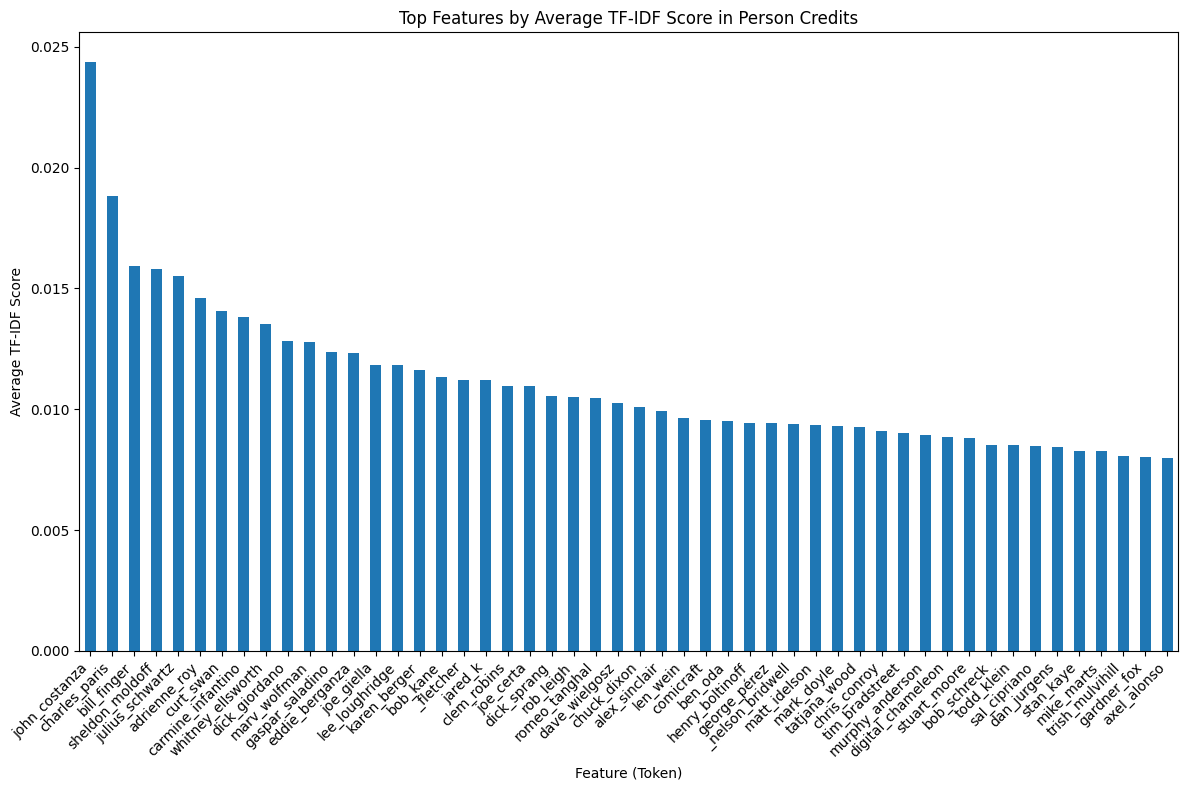

In [193]:
feature_names_person = tfidf_person.get_feature_names_out()
df_tfidf_person = pd.DataFrame(tfidf_person_matrix.toarray(), columns=feature_names_person)

avg_tfidf_scores_person = df_tfidf_person.mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 8))
avg_tfidf_scores_person.plot(kind='bar')
plt.title('Top Features by Average TF-IDF Score in Person Credits')
plt.xlabel('Feature (Token)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## story arc credits

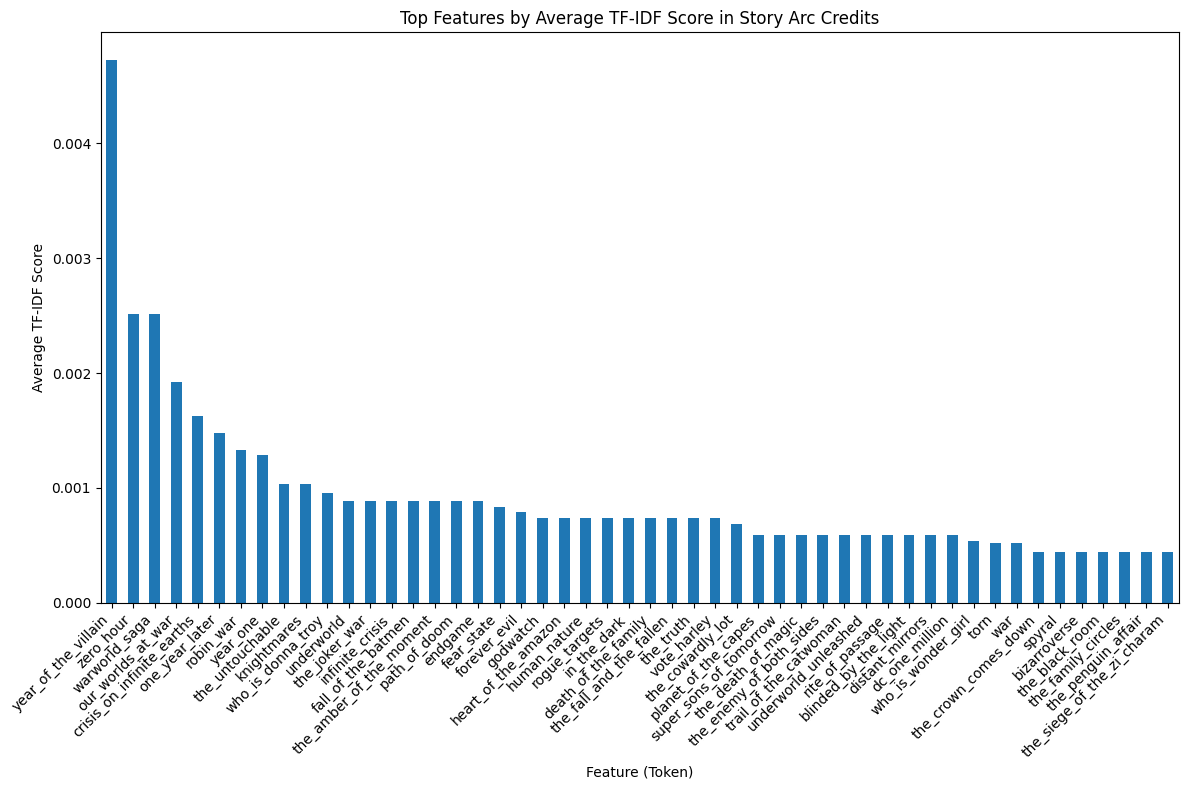

In [194]:
feature_names_arc = tfidf_arc.get_feature_names_out()
df_tfidf_arc = pd.DataFrame(tfidf_arc_matrix.toarray(), columns=feature_names_arc)

avg_tfidf_scores_arc = df_tfidf_arc.mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 8))
avg_tfidf_scores_arc.plot(kind='bar')
plt.title('Top Features by Average TF-IDF Score in Story Arc Credits')
plt.xlabel('Feature (Token)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## team credits

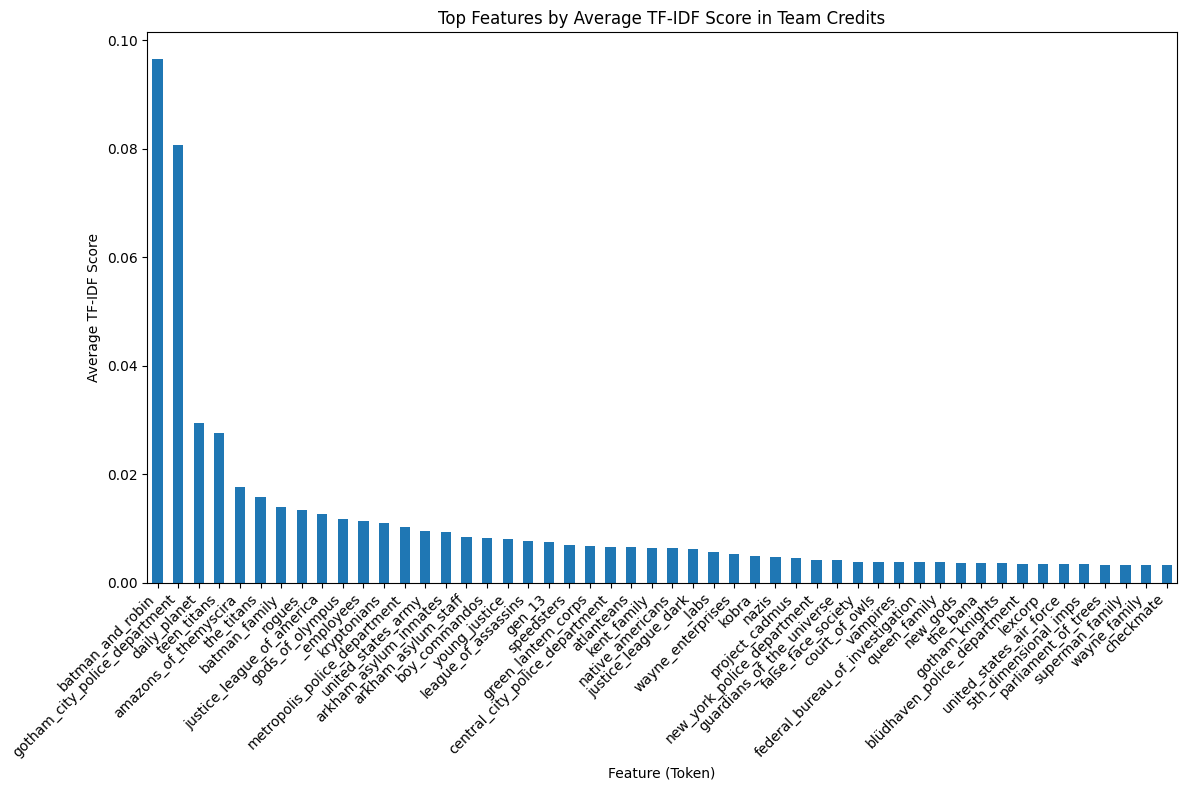

In [195]:
feature_names_team = tfidf_team.get_feature_names_out()
df_tfidf_team = pd.DataFrame(tfidf_team_matrix.toarray(), columns=feature_names_team)

avg_tfidf_scores_team = df_tfidf_team.mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 8))
avg_tfidf_scores_team.plot(kind='bar')
plt.title('Top Features by Average TF-IDF Score in Team Credits')
plt.xlabel('Feature (Token)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## volume

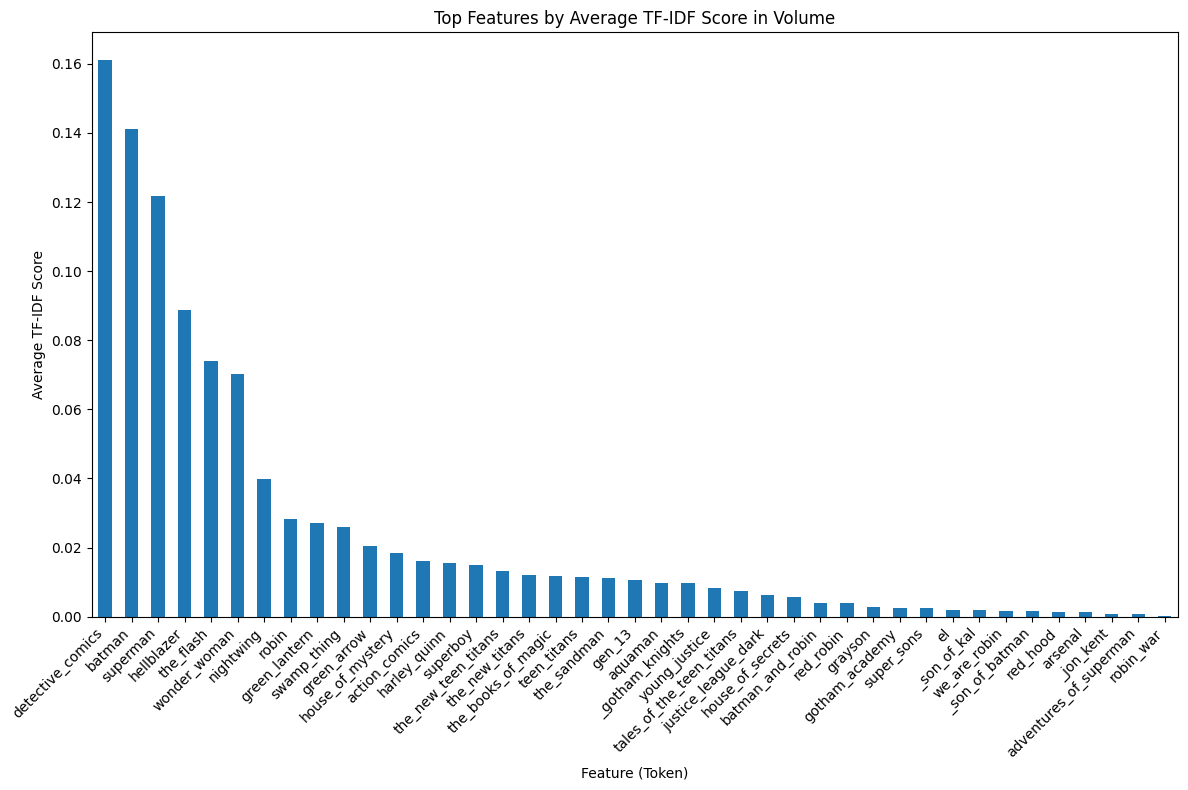

In [196]:
feature_names_vol = tfidf_vol.get_feature_names_out()
df_tfidf_vol = pd.DataFrame(tfidf_vol_matrix.toarray(), columns=feature_names_vol)

avg_tfidf_scores_vol = df_tfidf_vol.mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 8))
avg_tfidf_scores_vol.plot(kind='bar')
plt.title('Top Features by Average TF-IDF Score in Volume')
plt.xlabel('Feature (Token)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## combined description

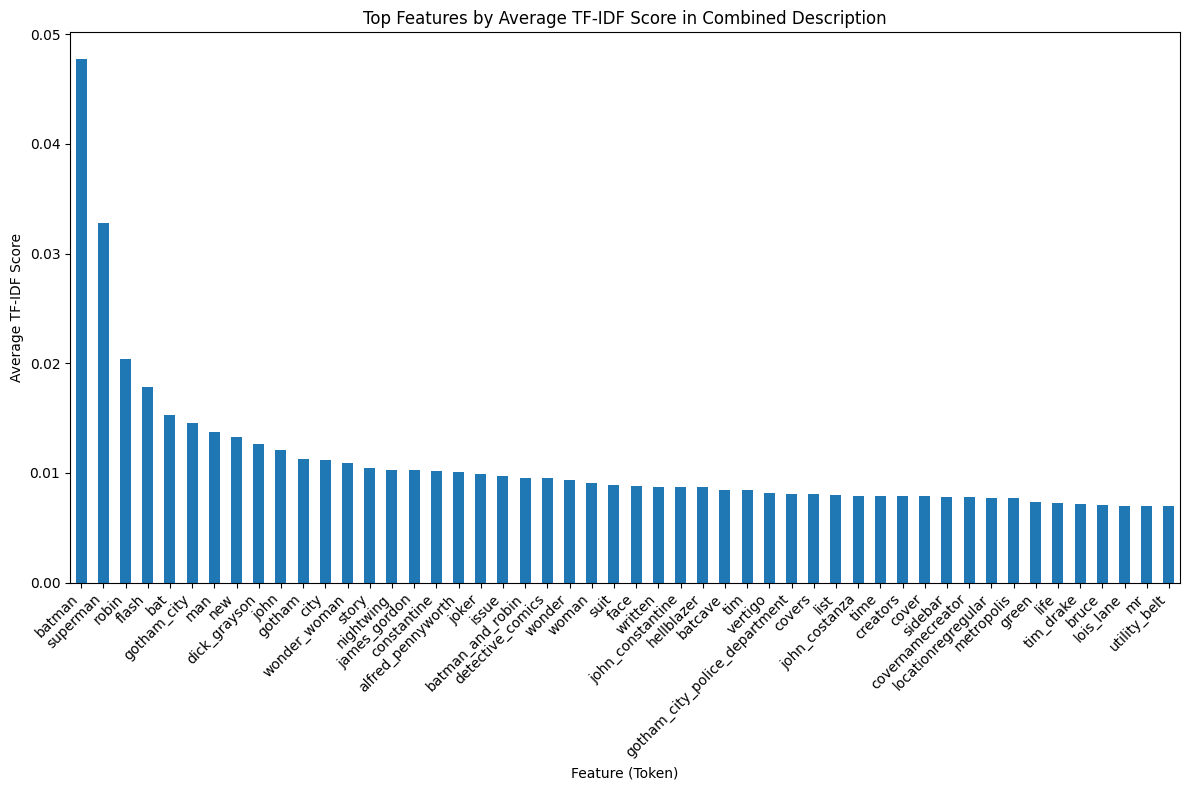

In [197]:
feature_names = tfidf.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

avg_tfidf_scores = df_tfidf.mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 8))
avg_tfidf_scores.plot(kind='bar')
plt.title('Top Features by Average TF-IDF Score in Combined Description')
plt.xlabel('Feature (Token)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Combining Matrixes and Weighting Them

In [198]:
tfidf_vectorizers = [tfidf_des, tfidf_char, tfidf_concept, 
                    tfidf_location, tfidf_object, tfidf_person,
                    tfidf_arc, tfidf_team, tfidf_vol]

In [199]:
all_matrices = [tfidf_des_matrix, tfidf_char_matrix, tfidf_concept_matrix, 
               tfidf_location_matrix, tfidf_object_matrix, tfidf_person_matrix,
               tfidf_arc_matrix, tfidf_team_matrix, tfidf_vol_matrix]

In [200]:
weights = [3, 2, 1,
           1, 0, 1,
           0, 1, 0]

In [201]:
# Scale each TF-IDF matrix by its corresponding weight
weighted_tfidf_matrices = [matrix * weight for matrix, weight in zip(all_matrices, weights)]

In [202]:
combined_matrix = hstack(weighted_tfidf_matrices)

# Top Features For Combined Matrix

In [203]:
# Get feature names from each vectorizer
feature_names = []
for i, vectorizer in enumerate(tfidf_vectorizers):
    feature_names.extend([f'col{i}_' + feature for feature in vectorizer.get_feature_names_out()])

In [204]:
df_tfidf = pd.DataFrame(combined_matrix.toarray(), columns=feature_names)

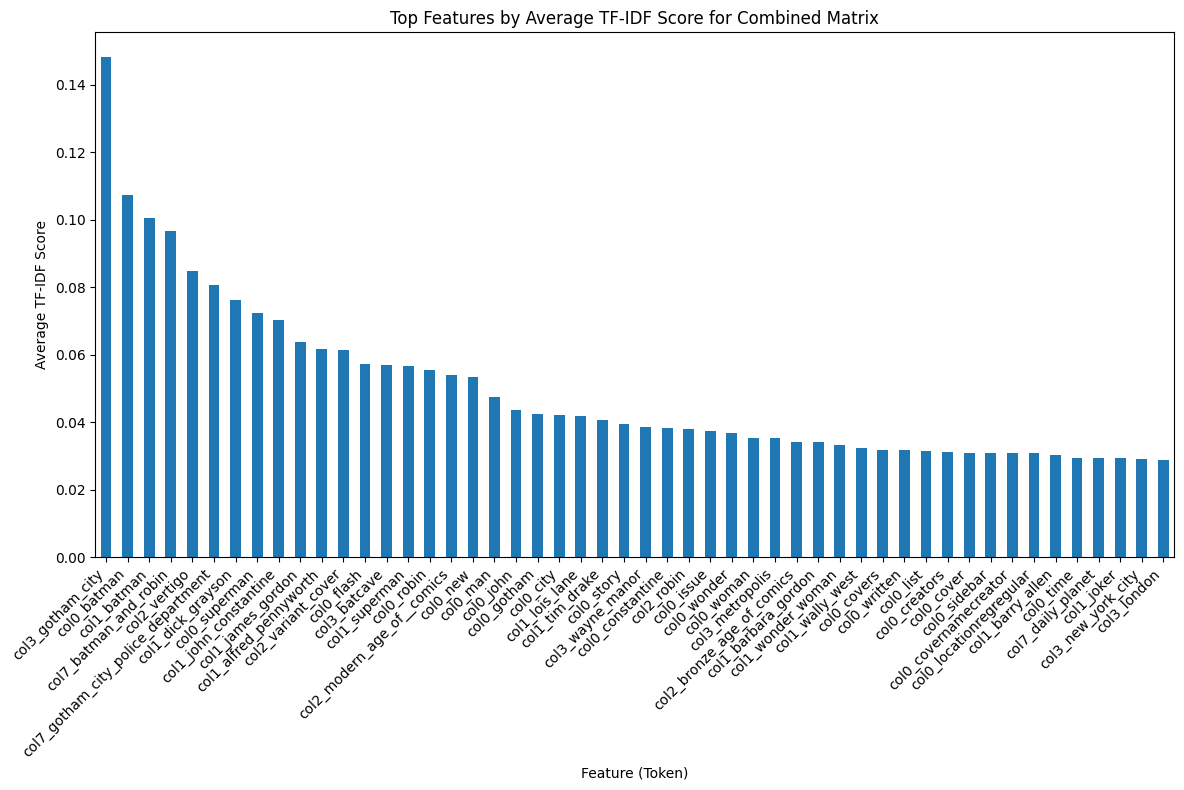

In [205]:
avg_tfidf_scores = df_tfidf.mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 8))
avg_tfidf_scores.plot(kind='bar')
plt.title('Top Features by Average TF-IDF Score for Combined Matrix')
plt.xlabel('Feature (Token)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Conclusion

The top features using average tfidf scores is not much different from the top features in the basic EDA. There might be one or two outliers, but the features are usually the same just in a different order. <br>
This is not the case for the combined_description vs combined_matrix. <br>
The combined_description is a string made by combining the description and columns. This overall feature is then vectorized and made into a matrix.
The combined_matrix is made by first vectorizing the description and seperate columns. Then, combining all the matrices into one overall matrix. <br>
Thus in the combined_matrix, the features in each of the columns and description are weight seperately. <br>
We can also control the weight of each column. We are unable to control the weights in the combined_description.

**Weight** After testing out many different combinations, I choose a weight combination loosely based on the number of 0 entires from the basic EDA. <br>
Description --> 3 <br>
Character --> 2 <br>
Concept --> 1 <br>
location --> 1 <br>
object --> 0 <br>
person --> 1 <br>
story arc --> 0 <br>
team --> 1 <br>
volume --> 0 <br>
I consider the description to be the most important column. So, I weighted it the most at 3. This is followed up by character_credits at 2 and then everything else. <br>
object_credits and story_arc_credits were both weighted 0 due to the sheer amoung of missing entires found in basic EDA. I decided to weight volume at 0 beacuse DC uses a lot of crossovers so the same story could take place across different volumes. 

There is a large difference between the top features in combined_description and combined_matrix. In addition, I can immediately notice that there are no features in combined_matrix that have been weighted 0. Overall, I think the combined_matrix will give us recommendations that are better suited/more accurate to the user. 